# 1
## (a)
Because the sample size is small, we will need to assume that the population of mass-charge ratios is normal to make any inferences. This is appropriate because the measure is physical and most physical phenomena follow a normal distribution. We do not know the population variance, however, so the t-distribution is the most appropriate model for the difference between these small samples.

We also assume that the tubes are running tests under the same conditions, and that the sample values are independent.

The 95% confidence interval for the difference in mean between two tubes:

In [1]:
alpha = 0.05
tube1 = c(0.57, 0.34, 0.43, 0.32, 0.48, 0.40, 0.40)
tube2 = c(0.53, 0.47, 0.47, 0.51, 0.63, 0.61, 0.48)

diff = tube1 - tube2
n = length(diff)
diff_mean = mean(diff)

intrvl = qt(1-alpha/2, n-1) * sd(diff)/sqrt(n)

cat(diff_mean - intrvl, diff_mean + intrvl)

-0.1901518 -0.02699106

The two tubes do not appear to produce consistent results (difference = 0), as the 95% confidence interval of mean differences between samples does not include 0.

## (b)
A 99% confidence interval of mean mass-charge ratio, treating the two sets of measurements as one sample.

In [2]:
alpha = 0.01
both = c(tube1, tube2)
n = length(both)

intrvl = qt(1-alpha/2, n-1) * sd(both)/sqrt(n)

cat(mean(both) - intrvl, mean(both) + intrvl)

0.3998468 0.5487246

Based on the mean and standard deviation of all mass-charge ratio observations, we are $99$% confident that the mean mass-charge ratio should fall between $0.4$ and $0.55$.

# 2
## (a)
Independent variable $x$ is duration of training for new recruits

Dependent variable $y$ is job performance
## (b)
Independent variable $x$ is concentration of a chemical additive in paint

Dependent variable $y$ is drying time of the paint
## (c)
Independent variable $x$ is expenditures incurred in promoting a product

Dependent variable $y$ is amount of product sales

# 3
## (a)
Draw scatterplot

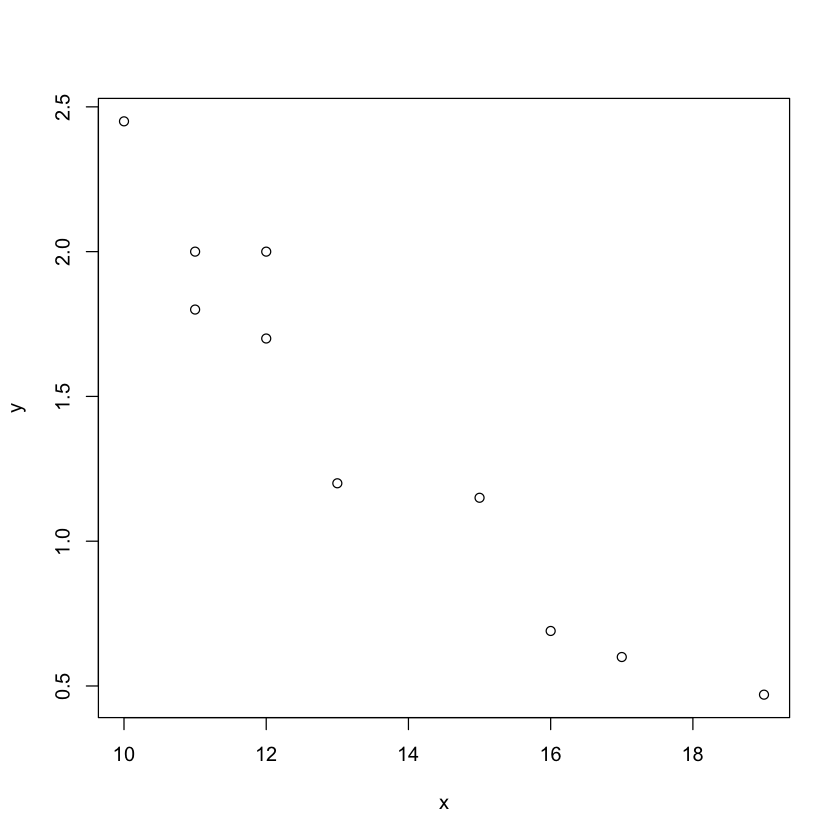

In [3]:
x = c(10,11,11,12,12,13,15,16,17,19)
y = c(2.45,1.80,2.00,2.00,1.70,1.20,1.15,0.69,0.60,0.47)

plot(x, y)

## (b)
Compute and add least squares regression line to the plot:

y =  4.366  +  -0.218 x

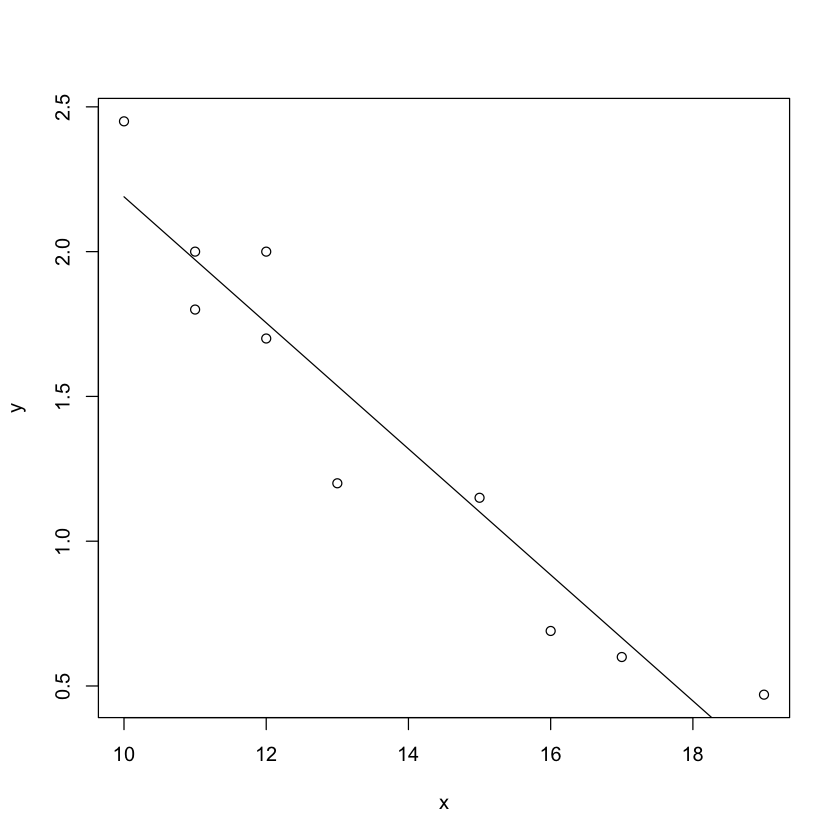

In [4]:
fit <- lm(y ~ x)
beta = round(coef(fit), 3)
cat('y = ', beta[1], ' + ', beta[2], 'x')

plot(x, y)
lines(x, fit$fitted.values)

## (c)
Testing $H_0: \beta_1 = 0$ vs. $H_A: \beta_1 \ne 0$:

In [5]:
format(summary(fit)$coefficients, scientific=F)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.365522388060,0.336026560848,12.991599167171,0.000001168116
x,-0.217611940299,0.024187721117,-8.996793837974,0.000018579788


The p-value of $x$ is well below any reasonable $\alpha$ limit, so we reject the null hypothesis that $\beta_1 = 0$.

# 4
File contains gross national product y in real dollars for 26 recent years.

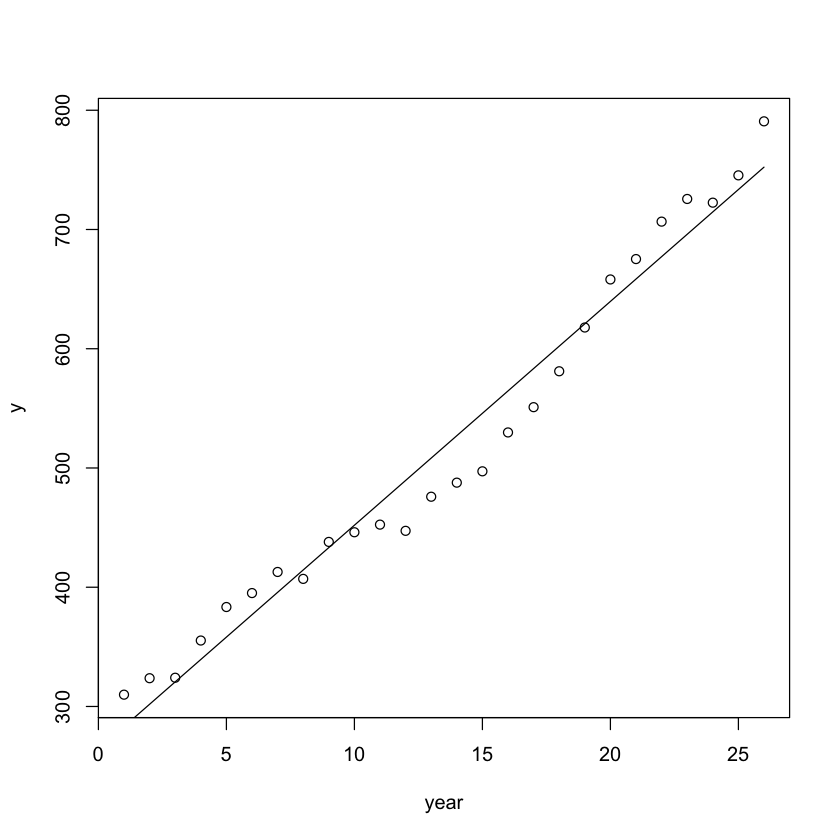

In [6]:
gross <- read.table('gross-2.dat', header=T)
gfit <- lm(y ~ year, data=gross)
plot(gross)
lines(gross$year, gfit$fitted.values)

We should not use linear regression here, because the model assumes that residuals/observations are independent of each other, which is not the case for this time-series GNP data. Each year's GNP value greatly depends on the previous year.

# 5
## (a)
Calculate $d = \frac {\sum_{t=2}^n{(\mu_t - \mu_{t-1})^2}} {\sum_{t=1}^{n}{\mu_t^2}}$ where $\mu_t = y_t - \hat{y}_t$ and $ t=1,...,n$.

$d_L = 1.30$ and $d_U = 1.46$ for 26 observations and 1 predictor.

In [7]:
y = gross$y
yhat = gfit$fitted.values

d_err = 0
err = 0
for (t in 1:26) {
    mu_t = y[t] - yhat[t]
    if (t > 1) d_err = c(d_err, (mu_t - end(d_err))^2)
    err = c(err, mu_t^2)
}
d = round(sum(d_err)/sum(err), 2)

cat('d =', d, fill=T)
if (d < 1.30) cat('d < d_L')
if (4-d < 1.30) cat('4-d < d_L')
if (d > 1.46 && 4-d > 1.46) cat('d > d_U AND 4-d > d_U')

d = 3.16
4-d < d_L

Because $4-d < d_L$, $d$ is significant, indicating autocorrelation of errors.

# 6

In [8]:
beetles = data.frame(pit=rep(1:4,each=5),
                     dist=c(6.25, 12.5, 25, 50, 100),
                     n_cap=c(5, 5, 4, 3, 1, 
                             3, 2, 5, 4, 2, 
                             4, 5, 3, 2, 2,
                             6, 4, 0, 2, 3))
str(beetles)

'data.frame':	20 obs. of  3 variables:
 $ pit  : int  1 1 1 1 1 2 2 2 2 2 ...
 $ dist : num  6.25 12.5 25 50 100 6.25 12.5 25 50 100 ...
 $ n_cap: num  5 5 4 3 1 3 2 5 4 2 ...


## (a)
Plot number of beetles captured vs dist and log(dist)

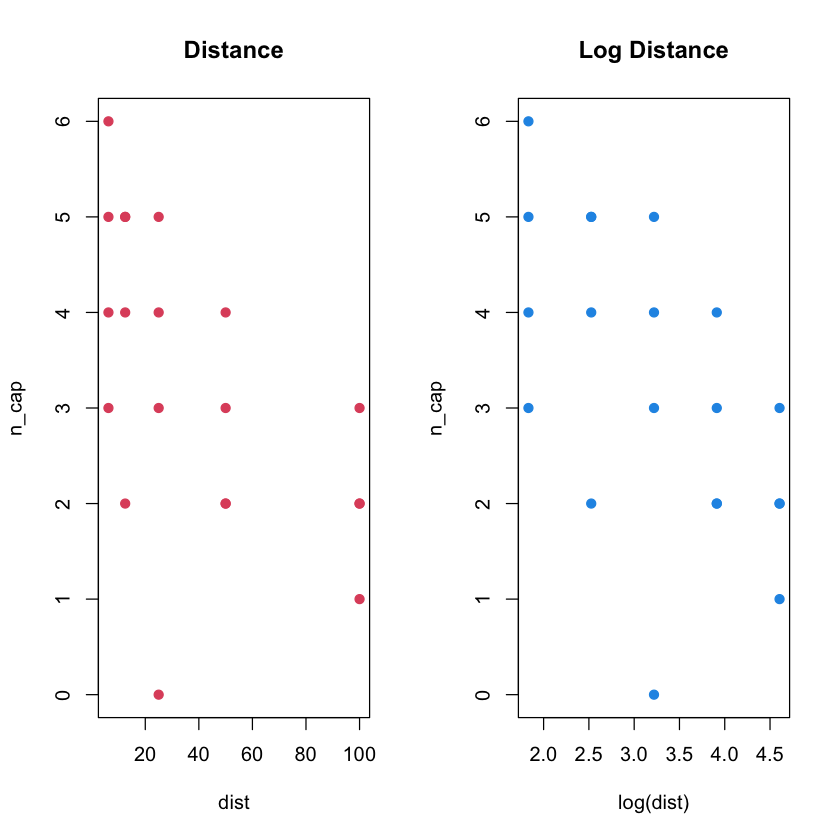

In [9]:
par(mfrow=c(1,2))
with(beetles, plot(dist, n_cap, pch=19, col=2, main='Distance'))
with(beetles, plot(log(dist), n_cap, pch=19, col=4, main='Log Distance'))

## (b)
Fit least squares to each dataset

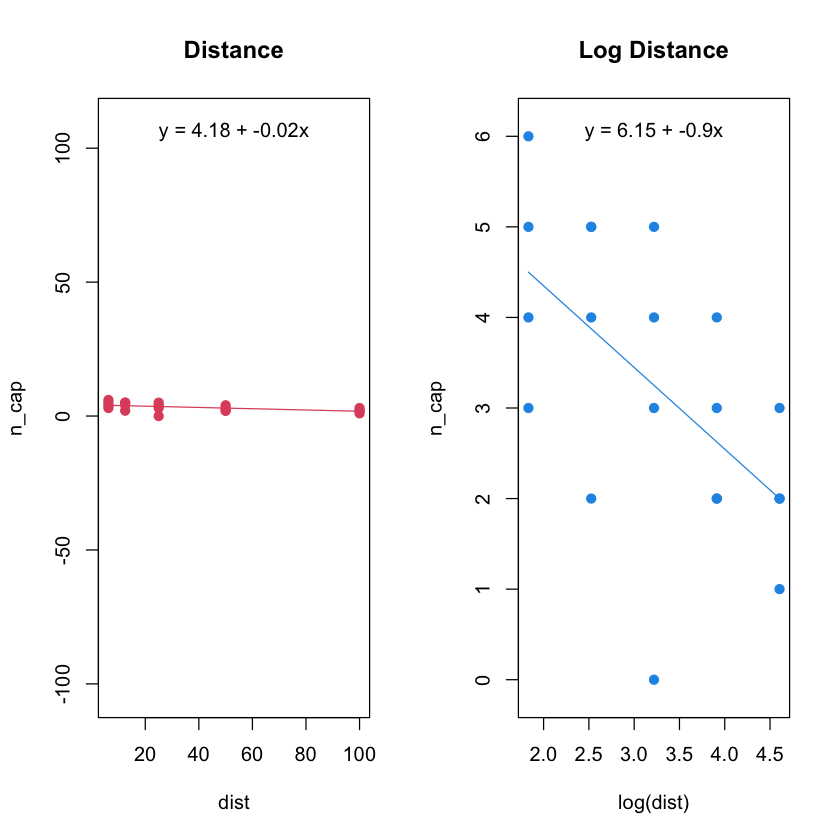

In [10]:
lin_fit = lm(n_cap ~ dist, beetles)
log_fit = lm(n_cap ~ log(dist), beetles)

par(mfrow=c(1,2))
with(beetles, 
     plot(dist, n_cap, pch=19, col=2, asp=1, main='Distance'))
lines(beetles$dist, lin_fit$fitted.values, col=2)
mtext(paste0('y = ', 
             paste(round(coef(lin_fit), 2), collapse=' + '),
             'x'), 
      padj=3)

with(beetles, 
     plot(log(dist), n_cap, pch=19, col=4, asp=1, main='Log Distance'))
lines(log(beetles$dist), log_fit$fitted.values, col=4)
mtext(paste0('y = ', 
             paste(round(coef(log_fit), 2), collapse=' + '),
             'x'), 
      padj=3)

## (c)
Test $H_0: \beta_1 = 0$ vs $H_A: \beta_1 \ne 0$

In [11]:
(lin_coef = coef(summary(lin_fit)))
linear_p = round(lin_coef['dist', 'Pr(>|t|)'], 4)
cat('Linear model beta_1 p-value:', linear_p, fill=T)

(log_coef = coef(summary(log_fit)))
log_p = round(log_coef['log(dist)', 'Pr(>|t|)'], 4)
cat('Log model beta_1 p-value:', log_p)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.17708333,0.45444089,9.191698,3.214512e-08
dist,-0.02392473,0.00880451,-2.717327,1.412189e-02


Linear model beta_1 p-value: 0.0141


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),6.1524101,0.9929667,6.195988,7.562878e-06
log(dist),-0.9016844,0.2951018,-3.055503,6.810193e-03


Log model beta_1 p-value: 0.0068

The $\beta_1$ p-value of both models is quite low, below any reasonable $\alpha$, so in both cases we reject the null hypothesis.  
The data indicate that there is some nonzero relationship between release distance and number of beetles captured ($H_A: \beta_1 \ne 0$). As indicated by the lower p-value of the model fit using log distances, that relationship is better described not as directly linear, but logarithmically linear.

## (d)
95% confidence interval for the mean at release distance 18cm

In [12]:
beetles2 = aggregate(beetles, 
                     list(Dist=beetles$dist), 
                     mean)[,c('dist', 'n_cap')]
log_fit2 = lm(n_cap ~ log(dist), beetles2)

predict(log_fit2, data.frame(dist=18), 
        interval='confidence', level=0.95)

,fit,lwr,upr
1,3.546207,3.280861,3.811553


## (e)
Based on residuals, are any model modifications necessary?

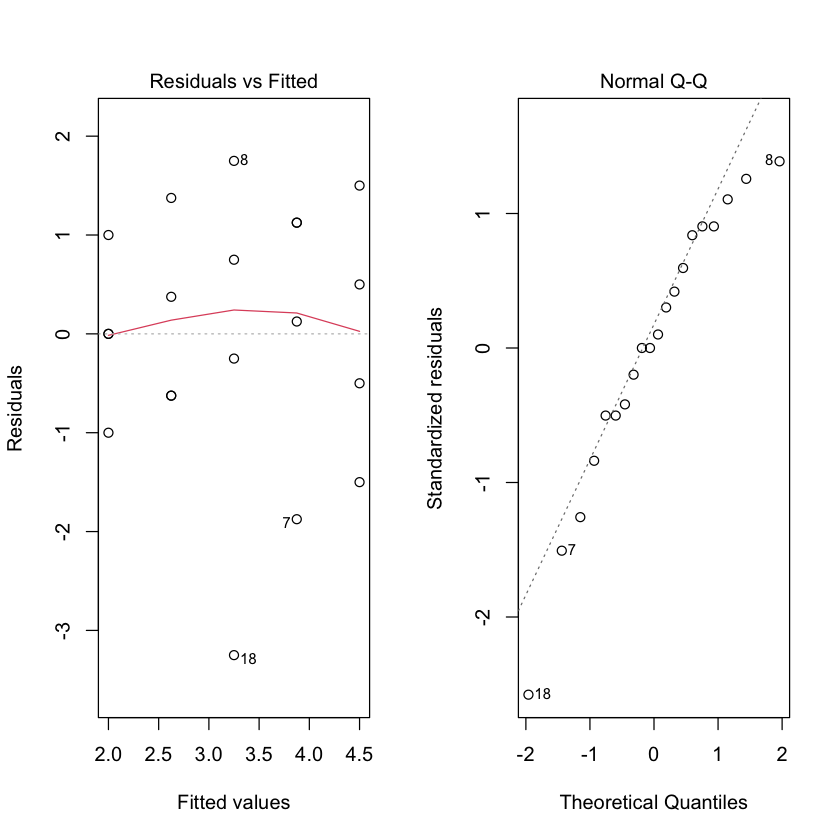

In [13]:
par(mfrow=c(1,2))
plot(log_fit, which=c(1,2))

We have already identified an issue and modified the base model. Checking the log model, it seems that there is an outlier in our data. Fitting the model without that outlier may result in a better prediction.

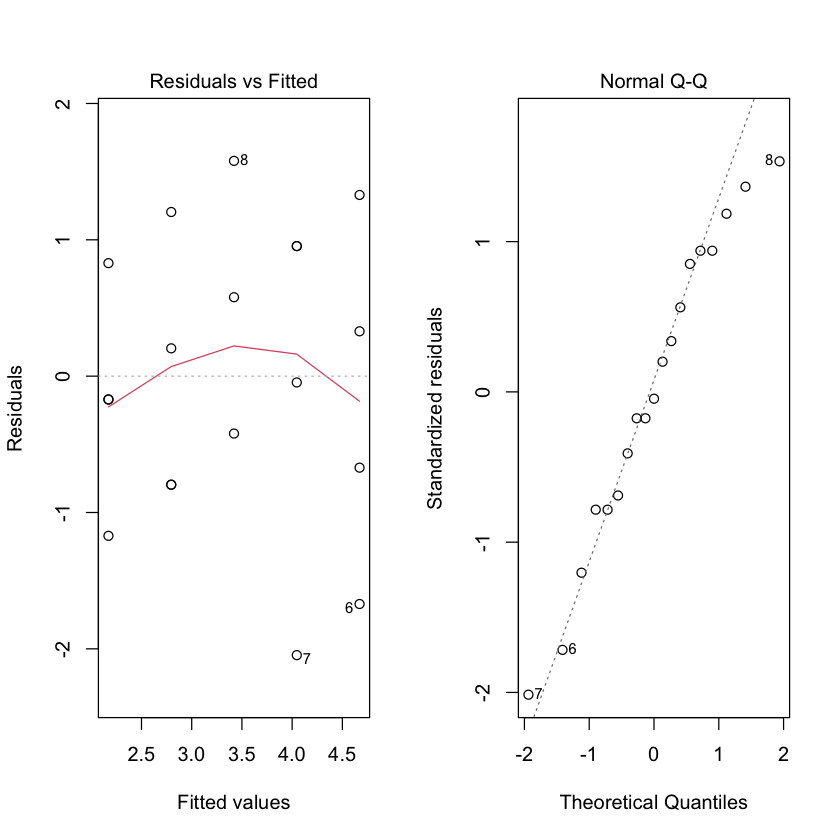

In [14]:
log_fit3 <- lm(n_cap ~ log(dist), data=beetles[-18,])

par(mfrow=c(1,2))
plot(log_fit3, which=c(1,2))

In [15]:
cat('Linear model\t\tadj.r^2:', summary(lin_fit)$adj.r.squared, fill=T)
cat('Log model\t\tadj.r^2:', summary(log_fit)$adj.r.squared, fill=T)
cat('Log model (no outlier)\tadj.r^2:', summary(log_fit3)$adj.r.squared, fill=T)

Linear model		adj.r^2: 0.251493
Log model		adj.r^2: 0.3049484
Log model (no outlier)	adj.r^2: 0.4188942
